## IMPORT DATASET

In [1]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
from nltk import ngrams
import numpy as np
import matplotlib

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


## SCRAPING

In [2]:
url = "yt.html"
page = open(url, encoding="utf8")
soup = BeautifulSoup(page.read())

In [3]:
spans = soup.find_all('div', {'class' : 'style-scope ytd-expander'})
lines = [span.get_text() for span in spans]
#gvxzyvdx aeinzg81 t7p7dqev gh25dzvf exr7barw b6ax4al1 gem102v4 ncib64c9 mrvwc6qr sx8pxkcf f597kf1v cpcgwwas m2nijcs8 hxfwr5lz k1z55t6l oog5qr5w innypi6y rtxb060y

In [4]:
df = pd.DataFrame(lines,columns=['Komentar'])
df.head(1804)

,Komentar
0,\n\n\n\nPemerintah resmi mengumumkan kenaikan ...
1,\nPemerintah resmi mengumumkan kenaikan harga ...
2,"\n\nSemangaaat guys, semoga seluruh rakyat Ind..."
3,\n\nAmin yrbl alamin bang R\n
4,\n\nAamiin\n
...,...
1800,"\n\nMinyak paling mahal negara indonesia, di m..."
1801,\n\nBLT itu jadi alat adu domba rakyat klo bag...
1802,"\n\nWOI, , ,inilah hadiah untuk orang pinggira..."
1803,\n\nSemoga rezim ini di laknat alloh\n


In [5]:
df.to_csv('Data_yt.csv')

## CLEANSING

In [6]:
df = pd.read_excel('DataSetelahLabel1.xlsx')
df.head(1804)

,Label,Komentar
0,2,"Semangaaat guys, semoga seluruh rakyat Indones..."
1,2,Amin yrbl alamin bang R
2,2,Aamiin
3,2,Aaaammiiinnn...
4,2,Amin yra
...,...,...
1799,0,"Minyak paling mahal negara indonesia, di malay..."
1800,1,BLT itu jadi alat adu domba rakyat klo bagiinn...
1801,1,"WOI, , ,inilah hadiah untuk orang pinggiran 77..."
1802,1,Semoga rezim ini di laknat alloh


## LABELING

In [7]:
df.dtypes

Label        int64
Komentar    object
dtype: object

In [8]:
df['Label'].value_counts()

1    907
2    495
0    402
Name: Label, dtype: int64

In [9]:
df['Label'] = df['Label'].astype('category')

In [10]:
df.isnull().sum()

Label       0
Komentar    0
dtype: int64

## REMOVE OF PUNCTUATION (Cleaning)

In [11]:
import re
import string

def remove(text):
  text = text.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', ' ').replace('\\', ' ')
  text = text.encode('ascii', 'replace').decode('ascii')
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", ' ', text).split())
  return text.replace('http://', ' ').replace('https://', ' ')

df['Komentar'] = df['Komentar'].apply(remove)

def remove_number(text):
  return re.sub(r'\d+', '', text)

df['Komentar'] = df['Komentar'].apply(remove_number)

def remove_punc(text):
  return text.translate(str.maketrans('','',string.punctuation))

df['Komentar'] = df['Komentar'].apply(remove_punc)

def remove_whitespace(text):
  return text.strip()

df['Komentar'] = df['Komentar'].apply(remove_whitespace)

def remove_whitespace_multi(text):
  return re.sub('\s+', ' ', text)

df['Komentar'] = df['Komentar'].apply(remove_whitespace_multi)

def remove_single_char(text):
  return re.sub(r'\b[a-zA-Z]\b', '', text)

df['Komentar'] = df['Komentar'].apply(remove_single_char)

df.head(1804)

,Label,Komentar
0,2,Semangaaat guys semoga seluruh rakyat Indonesi...
1,2,Amin yrbl alamin bang
2,2,Aamiin
3,2,Aaaammiiinnn
4,2,Amin yra
...,...,...
1799,0,Minyak paling mahal negara indonesia di malaya...
1800,1,BLT itu jadi alat adu domba rakyat klo bagiinn...
1801,1,WOI inilah hadiah untuk orang pinggiran indone...
1802,1,Semoga rezim ini di laknat alloh


In [12]:
df.to_csv('Data_remove.csv')

## CASE FOLDING

In [13]:
df['Komentar'] = df['Komentar'].str.lower()
df.head(1804)

,Label,Komentar
0,2,semangaaat guys semoga seluruh rakyat indonesi...
1,2,amin yrbl alamin bang
2,2,aamiin
3,2,aaaammiiinnn
4,2,amin yra
...,...,...
1799,0,minyak paling mahal negara indonesia di malaya...
1800,1,blt itu jadi alat adu domba rakyat klo bagiinn...
1801,1,woi inilah hadiah untuk orang pinggiran indone...
1802,1,semoga rezim ini di laknat alloh


In [14]:
df.to_csv('Data_lower.csv')

## TOKENISASI

In [15]:
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
  return word_tokenize(text)

df['Komentar'] = df['Komentar'].apply(word_tokenize_wrapper)
print('Hasil Tokenisasi : ') 
df['Komentar'].head(1804)

Hasil Tokenisasi : 


0       [semangaaat, guys, semoga, seluruh, rakyat, in...
1                              [amin, yrbl, alamin, bang]
2                                                [aamiin]
3                                          [aaaammiiinnn]
4                                             [amin, yra]
                              ...                        
1799    [minyak, paling, mahal, negara, indonesia, di,...
1800    [blt, itu, jadi, alat, adu, domba, rakyat, klo...
1801    [woi, inilah, hadiah, untuk, orang, pinggiran,...
1802              [semoga, rezim, ini, di, laknat, alloh]
1803    [rakyat, indonesia, dah, ngerti, yg, nggak, ng...
Name: Komentar, Length: 1804, dtype: object

In [16]:
df.to_csv('Data_token.csv')

## STEMMING

In [17]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
# stemming process
def stemming(words):
  return [stemmer.stem(word) for word in words]

df['Komentar'] = df['Komentar'].apply(stemming)
df.head(1804)

,Label,Komentar
0,2,"[semangaaat, guys, moga, seluruh, rakyat, indo..."
1,2,"[amin, yrbl, alamin, bang]"
2,2,[aamiin]
3,2,[aaaammiiinnn]
4,2,"[amin, yra]"
...,...,...
1799,0,"[minyak, paling, mahal, negara, indonesia, di,..."
1800,1,"[blt, itu, jadi, alat, adu, domba, rakyat, klo..."
1801,1,"[woi, ini, hadiah, untuk, orang, pinggir, indo..."
1802,1,"[moga, rezim, ini, di, laknat, alloh]"


In [18]:
df.to_csv('Data_stemming.csv')

## STOPWORD

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
list_stopwords = stopwords.words('indonesian')
list_stopwords = set(list_stopwords)

In [21]:
print(list_stopwords)

{'makin', 'sama', 'sebelum', 'kasus', 'sesuatu', 'didapat', 'kapan', 'tambah', 'justru', 'bukan', 'diri', 'agak', 'jawab', 'kalaulah', 'mempersiapkan', 'sekarang', 'seketika', 'lama', 'sekurang-kurangnya', 'menegaskan', 'jelas', 'diperkirakan', 'siapapun', 'cukup', 'disebutkan', 'semula', 'akulah', 'harusnya', 'dijawab', 'bahwa', 'menuju', 'jelasnya', 'baik', 'seharusnya', 'hendak', 'seusai', 'setiba', 'suatu', 'diungkapkan', 'bertanya', 'berikan', 'dan', 'bermula', 'namun', 'kurang', 'berikut', 'tegas', 'kelihatannya', 'saling', 'mereka', 'soal', 'walau', 'sebutlah', 'soalnya', 'selama-lamanya', 'lagian', 'berkenaan', 'hendaknya', 'toh', 'adapun', 'supaya', 'bersama-sama', 'sekurangnya', 'dia', 'sesegera', 'sedangkan', 'menyangkut', 'memperlihatkan', 'sendirinya', 'berlangsung', 'terkira', 'mau', 'terdapat', 'apakah', 'diucapkannya', 'jumlah', 'semacam', 'termasuk', 'tampaknya', 'karenanya', 'pula', 'menaiki', 'berapalah', 'meskipun', 'berlainan', 'nanti', 'sepihak', 'hari', 'keluar',

In [22]:
def remove_stopwords(words):
  return [word for word in words if word not in list_stopwords]

df['Komentar'] = df['Komentar'].apply(remove_stopwords)

print('Hasil Stopwords : \n')
df['Komentar'].head(1804)

Hasil Stopwords : 



0       [semangaaat, guys, moga, rakyat, indonesia, se...
1                              [amin, yrbl, alamin, bang]
2                                                [aamiin]
3                                          [aaaammiiinnn]
4                                             [amin, yra]
                              ...                        
1799    [minyak, mahal, negara, indonesia, malayasia, ...
1800    [blt, alat, adu, domba, rakyat, klo, bagiinnya...
1801    [woi, hadiah, orang, pinggir, indonesia, merde...
1802                         [moga, rezim, laknat, alloh]
1803    [rakyat, indonesia, dah, ngerti, yg, nggak, ng...
Name: Komentar, Length: 1804, dtype: object

In [23]:
df.to_csv('Data_stop.csv')

## UNLISTING

In [24]:
df['Komentar'] = df['Komentar'].agg(lambda x: ','.join(map(str, x)))
df.head(1804)

,Label,Komentar
0,2,"semangaaat,guys,moga,rakyat,indonesia,sehat,la..."
1,2,"amin,yrbl,alamin,bang"
2,2,aamiin
3,2,aaaammiiinnn
4,2,"amin,yra"
...,...,...
1799,0,"minyak,mahal,negara,indonesia,malayasia,rm,sen..."
1800,1,"blt,alat,adu,domba,rakyat,klo,bagiinnya,gak,sa..."
1801,1,"woi,hadiah,orang,pinggir,indonesia,merdeka,pua..."
1802,1,"moga,rezim,laknat,alloh"


In [25]:
df.to_excel('data_clear1.xlsx', index=False)

## Remove Blank Text

In [26]:
df = df[df['Komentar'] != '']
df.head(1804)

,Label,Komentar
0,2,"semangaaat,guys,moga,rakyat,indonesia,sehat,la..."
1,2,"amin,yrbl,alamin,bang"
2,2,aamiin
3,2,aaaammiiinnn
4,2,"amin,yra"
...,...,...
1799,0,"minyak,mahal,negara,indonesia,malayasia,rm,sen..."
1800,1,"blt,alat,adu,domba,rakyat,klo,bagiinnya,gak,sa..."
1801,1,"woi,hadiah,orang,pinggir,indonesia,merdeka,pua..."
1802,1,"moga,rezim,laknat,alloh"


In [27]:
df['Label'].value_counts()

1    906
2    492
0    394
Name: Label, dtype: int64

In [28]:
df.to_excel('data_clear_2.xlsx', index=False)

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()

X = df['Komentar']
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
xv_train = cv.fit_transform(X_train)
xv_test = cv.transform(X_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, random_state=0)
classifier.fit(xv_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [32]:
y_pred = classifier.predict(xv_test)

In [33]:
from sklearn.metrics import accuracy_score
acc = round(accuracy_score(y_test, y_pred),2)
print(str(round(acc*100,2)) + ' %')

60.0 %


In [34]:
from sklearn.metrics import classification_report
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54        83
           1       0.62      0.79      0.69       171
           2       0.59      0.34      0.43       105

    accuracy                           0.60       359
   macro avg       0.59      0.55      0.56       359
weighted avg       0.60      0.60      0.58       359



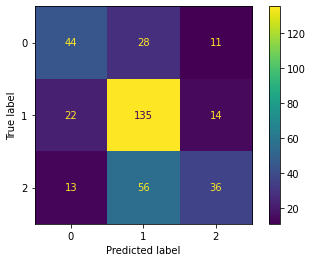

In [35]:
from sklearn.metrics import plot_confusion_matrix
#print plot_confusion_matrix
plot_confusion_matrix(classifier, xv_test, y_test)

In [36]:
import pickle as pkl

filename = 'finalized_model_random.sav'
pkl.dump(classifier, open(filename, 'wb'))

In [37]:
pkl.dump(cv, open("vectorizerrr.pickle", "wb"))